<a href="https://colab.research.google.com/github/aolivera0/MetNumUN2024II/blob/main/Lab6/aolivera_group1_CubicEquation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 6

*   Angel Olivera Pinzón

  * UN ID: aolivera
  * List number: 32





For the cubic equation
$$ ax^3+bx^+cx +d = 0$$

and use Cubic equation General cubic formula- [wikipedia](https://en.wikipedia.org/wiki/Cubic_equation)


$$ Δ_0=b^2 -3ac $$

$$ Δ_1=2b^3 -9abc+27a^2d $$

$$C=\sqrt[3]{\frac{Δ_1 \pm \sqrt{Δ_1^2-4Δ_0^3}}{2}}$$

The sign "$\pm$" before the square root is either "+" or "–"; the choice is almost arbitrary, and changing it amounts to choosing a different square root. However, if a choice yields C = 0 (this occurs if $\Delta_0 = 0 $, then the other sign must be selected instead. If both choices yield C = 0, that is, if
$\Delta_0 = 0 $ and $\Delta_1 = 0 $ a fraction ⁠$\frac{0}{0}$ occurs in following formulas; this fraction must be interpreted as equal to zero (see the end of this section). With these conventions, the three roots are

$$x_k=-\frac{1}{3a}\left(b+ \xi^k C+\frac{Δ_0}{\xi^k C}\right), \hspace{2cm} k \in \{1,2,3\}$$


with
$\xi$ a primitive cube root of unity, i.e.,
$$\xi = \left( -\frac{1}{2} \pm \frac{\sqrt{3}}{2} i \right)$$

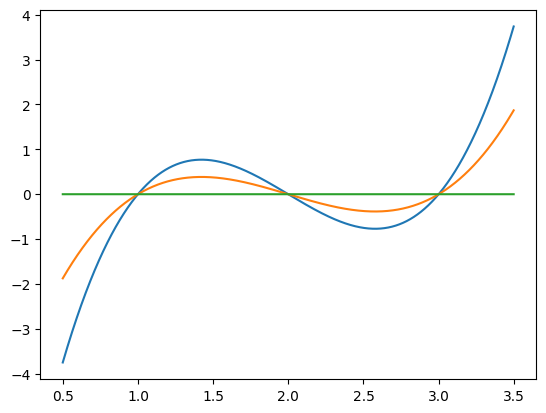

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def cubic(a,b,c,d,x):
    return a*x**3+b*x**2+c*x+d

def cubicequiv(a,b,c,d,x):
    return x**3+(b/a)*x**2+(c/a)*x+(d/a)

x = np.arange(0.5, 3.5, 0.001)
z = np.zeros(len(x))
y = cubic(2,-12,22,-12,x)
ynew = cubicequiv(2,-12,22,-12,x)
plt.plot(x, y, x, ynew, x,z)
plt.show()

In [2]:
# Calculate a cube roots https://stackoverflow.com/questions/60499277/cube-roots-of-a-complex-number-in-python

x=1
f = 1j**(2/3)
C1 = complex(1)**(1/3)
C2 = -C1*f # rotate 2pi/3
C3 = complex(C2.real,-C2.imag)
print(C1,C2,C3,C1*f**2)

(1+0j) (-0.5000000000000001-0.8660254037844386j) (-0.5000000000000001+0.8660254037844386j) (-0.4999999999999998+0.8660254037844388j)


Asuume $a=1$ then the equations are of the form

$$ x^3+bx^+cx +d = 0$$ and complete the following function.

In [3]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

def solve_cubic(b,c,d):
  a = 1
  result = []

  # calculate intermediate values
  p = (3*a*c - b**2) / (3*a**2)
  q = (2*b**3 - 9*a*b*c + 27*a**2*d) / (27*a**3)
  delta = (q**2 / 4 + p**3 / 27)

  # determine number and type of roots
  if delta > 0:  # one real and two complex roots
      u = (-q/2 + cmath.sqrt(delta))**(1/3)
      v = (-q/2 - cmath.sqrt(delta))**(1/3)
      x1 = u + v - b / (3*a)
      x2 = -(u + v)/2 - b / (3*a) + (u - v)*cmath.sqrt(3)/2j
      x3 = -(u + v)/2 - b / (3*a) - (u - v)*cmath.sqrt(3)/2j
      print("One real root and two complex roots:")
      print("x1 = ", x1.real)
      print("x2 = ", x2)
      print("x3 = ", x3)
      result = [x1.real, x2,x3]
  elif delta == 0:  # three real roots, two are equal
      u = (-q/2)**(1/3)
      v = u
      x1 = 2*u - b / (3*a)
      x2 = -u - b / (3*a)
      #In the case of delta == 0, x3 should be equal to x2
      x3 = x2 #Assign x3 to x2 for delta == 0 case
      print("Three real roots, two are equal:")
      print("x1 = ", x1.real)
      print("x2 = ", x2.real)
      print("x3 = ", x3.real)
      result =  [x1.real,x2.real, x3.real]
  else:  # three distinct real roots
      u = (-q/2 + cmath.sqrt(delta))**(1/3)
      v = (-q/2 - cmath.sqrt(delta))**(1/3)
      x1 = u + v - b / (3*a)
      x2 = -(u + v)/2 - b / (3*a) + (u - v)*cmath.sqrt(3)/2j
      x3 = -(u + v)/2 - b / (3*a) - (u - v)*cmath.sqrt(3)/2j
      print("Three distinct real roots:")
      print("x1 = ", x1.real)
      print("x2 = ", x2.real)
      print("x3 = ", x3.real)
      result = [x1.real,x2.real,x3.real]

  print("y1 =", (a*x1**3)+(b*x1**2)+c*x1+d)
  print("y2 =", (a*x2**3)+(b*x2**2)+c*x2+d)
  print("y3 =", (a*x3**3)+(b*x3**2)+c*x3+d)

  x = np.linspace(-3, 4, 1000)

  def cubic_eq(x,a,b,c,d):

      return a*x**3 +b*x**2 + c*x + d

  y = cubic_eq(x,a,b,c,d)

  fig, ax = plt.subplots()
  ax.plot(x, y)

  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  plt.show()

  return result

Test cases that include
$$(x-1)(x-2)(x-3) = x^3 - 6 x^2 + 11 x - 6 = 0 $$

$$(x-1) \left( x + \frac{1}{2} + i \frac{\sqrt{3}}{2}\right) \left( x + \frac{1}{2} - i \frac{\sqrt{3}}{2}\right) =   x^3 -1 =  0  $$

$$(x-1)^3 = x^3 - 3 x^2 + 3 x - 1 = 0 $$

$$(x)(x-i)(x+i) = x^3 + x  = 0 $$

$$(x-1)(x-i)(x+i) = x^3 - x^2 + x - 1 = 0 $$

$$ (x+2)^2 (x-1) = x^3 + 3 x^2 - 4 = 0  $$

$$ (x+2)^2 (x-1) = x^3 + 10^6 x^2  = 0  $$

$$ (x+2)^2 (x-1) = x^3 + 10^7 x^2  = 0  $$
three real diferent roots,  roots in the last digits of the group members, root of multiplicity two, and complex roots with small and large $b$.

**Last digits:**

Three distinct real roots:
x1 =  3.0
x2 =  2.0
x3 =  1.0
y1 = 0j
y2 = 0j
y3 = 0j


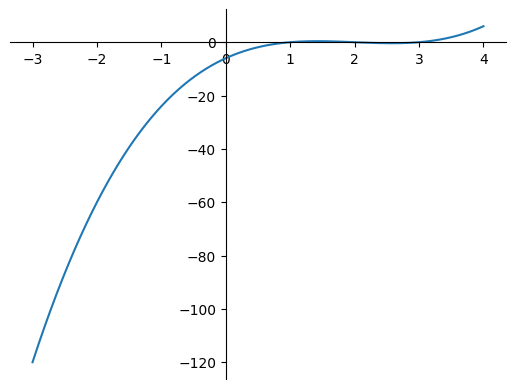

True
One real root and two complex roots:
x1 =  1.0
x2 =  (-0.5-0.8660254037844386j)
x3 =  (-0.5+0.8660254037844386j)
y1 = 0j
y2 = (-2.220446049250313e-16-1.1102230246251565e-16j)
y3 = (-2.220446049250313e-16+1.1102230246251565e-16j)


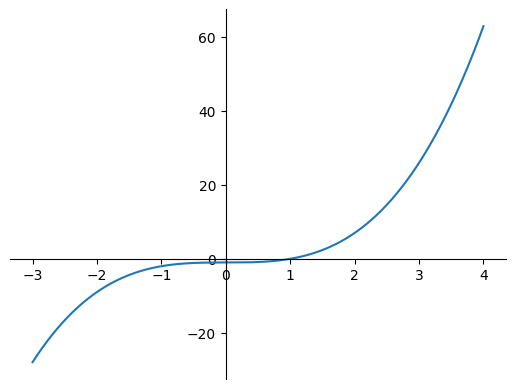

True
Three real roots, two are equal:
x1 =  1.0
x2 =  1.0
x3 =  1.0
y1 = 0.0
y2 = 0.0
y3 = 0.0


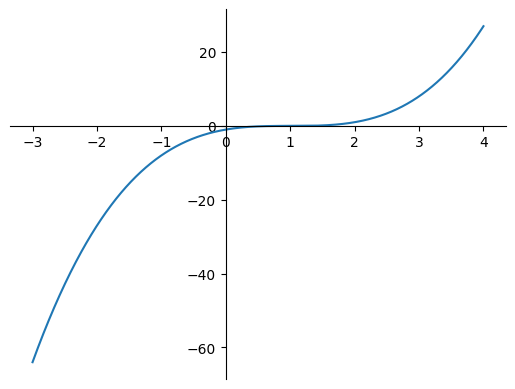

True
One real root and two complex roots:
x1 =  0.5000000000000001
x2 =  (-1+1.1102230246251565e-16j)
x3 =  (0.49999999999999983-0.8660254037844387j)
y1 = 3.885780586188048e-16j
y2 = 3.3306690738754696e-16j
y3 = (2.220446049250313e-16+4.996003610813204e-16j)


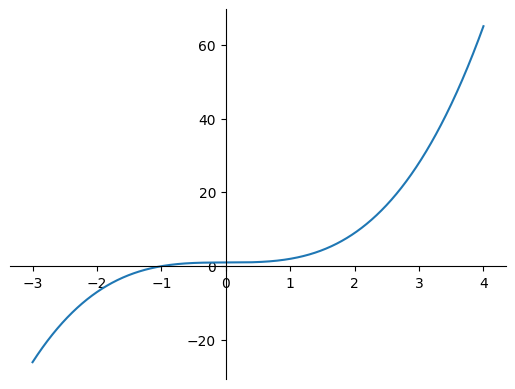

False
One real root and two complex roots:
x1 =  1.3660254037844386
x2 =  (-0.3660254037844386-0.7886751345948129j)
x3 =  (-1.1102230246251565e-16+0.5773502691896257j)
y1 = (0.9106836025229592+0.8075499102701243j)
y2 = (-0.24401693585629247-1.1924500897298749j)
y3 = (-0.6666666666666667+0.38490017945975064j)


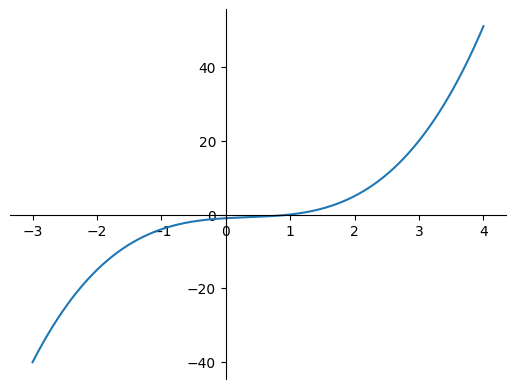

False
Three real roots, two are equal:
x1 =  1.0
x2 =  -2.0
x3 =  -2.0
y1 = 0.0
y2 = 0.0
y3 = 0.0


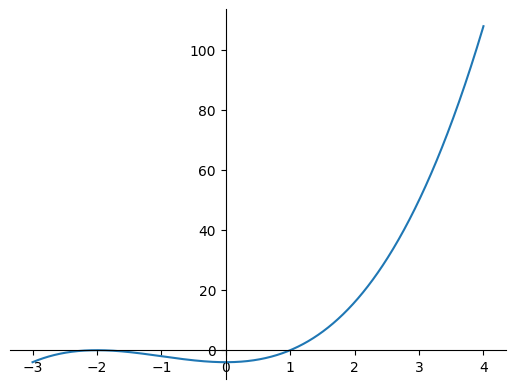

True
One real root and two complex roots:
x1 =  -1.7462298274040222e-10
x2 =  (-500000.00341662543-288675.13262222294j)
x3 =  (-499999.99658337433-288675.13656740234j)
y1 = (-3.3333333333333254e+17-1.9245008972987494e+17j)
y2 = (1.666666678055417e+17+9.622504289234784e+16j)
y3 = (1.6666666552779136e+17+9.622504683752723e+16j)


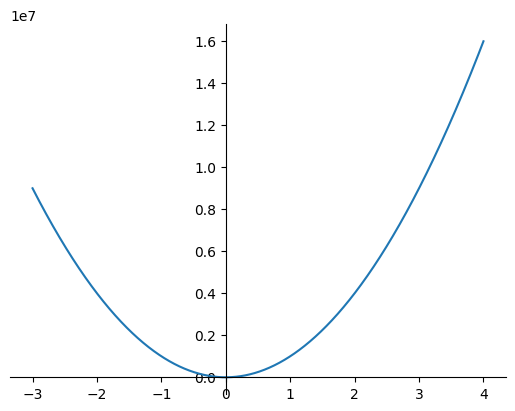

False
One real root and two complex roots:
x1 =  -2.3283064365386963e-09
x2 =  (-5000000.02473901-2886751.331665051j)
x3 =  (-4999999.975260988-2886751.360231201j)
y1 = (-3.3333333333333246e+20-1.92450089729875e+20j)
y2 = (1.6666666749130025e+20+9.622504343663005e+19j)
y3 = (1.6666666584203284e+20+9.622504629324503e+19j)


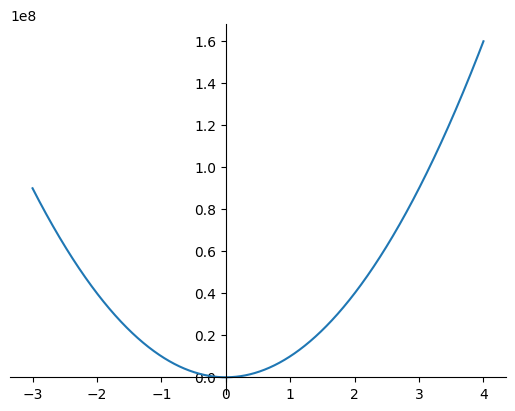

False


In [4]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},]

for var in variants:
    x1, x2, x3= solve_cubic(**var)
    print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))


In [5]:
# ChatGPT cubic equation with large b python
import numpy as np

def solve_cubic_np_roots(b,c,d):

  # Create a numpy array with the coefficients
  coefficients = [1, b, c, d]

  # Find the roots of the cubic equation
  roots = np.roots(coefficients)

  return roots



In [6]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},]

for var in variants:
             x1, x2, x3= solve_cubic_np_roots(**var)
             print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))


True
True
True
True
True
True
True
True


In [7]:
# ChatGPT cubic equation with large b python (regenerate)

import sympy as sp

def solve_cubic_sympy_solve(b,c,d):
  # Define the variables
  x = sp.symbols('x')

  # Define the cubic equation with a large 'b' coefficient
  equation = x**3 + b*x**2 + c*x + d

  # Solve the cubic equation
  roots= sp.solve(equation, x)

  return roots



In [8]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},]

for var in variants:
             roots = solve_cubic_sympy_solve(**var)
             ans = True
             for root in roots:
               ans = ans and allclose(cubic(1,var['b'],var['c'],var['d'],complex(root)), 0.0)
             print(ans)




True
True
True
True
True
True
True
True


In [10]:
from sympy import init_printing
init_printing()


b = 10e7  # Large 'b' coefficient
c = -1000.0
d = 1.0

roots = solve_cubic_sympy_solve(b,c,d)
roots

[-100000000.00001, 5.0000000000495e-6 - 9.98749217771834e-5⋅ⅈ, 5.0000000000495e-6 + 9.987492177718 ↪

↪ 34e-5⋅ⅈ]

In [11]:
from sympy import N
for root in roots:
    print(complex(root), cubic(1,b,c,d,complex(root)))

(-100000000.00001+0j) (7792641.009994507+0j)
(5.0000000000495e-06-9.98749217771834e-05j) 0j
(5.0000000000495e-06+9.98749217771834e-05j) 0j


All methods fail in some cases

Three distinct real roots:
x1 =  3.0
x2 =  2.0
x3 =  1.0
y1 = 0j
y2 = 0j
y3 = 0j


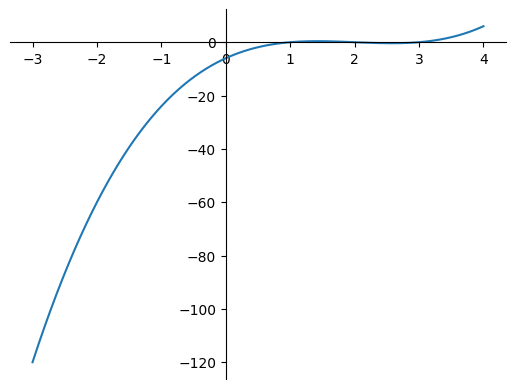

True
True
True
One real root and two complex roots:
x1 =  1.0
x2 =  (-0.5-0.8660254037844386j)
x3 =  (-0.5+0.8660254037844386j)
y1 = 0j
y2 = (-2.220446049250313e-16-1.1102230246251565e-16j)
y3 = (-2.220446049250313e-16+1.1102230246251565e-16j)


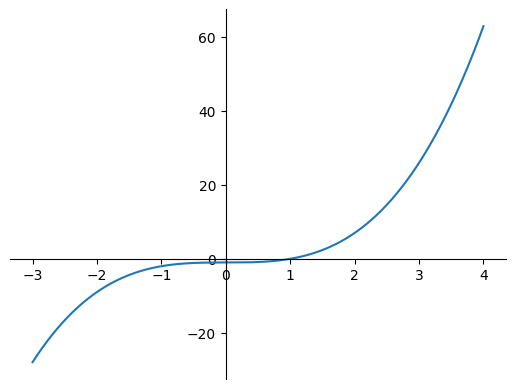

True
True
True
Three real roots, two are equal:
x1 =  1.0
x2 =  1.0
x3 =  1.0
y1 = 0.0
y2 = 0.0
y3 = 0.0


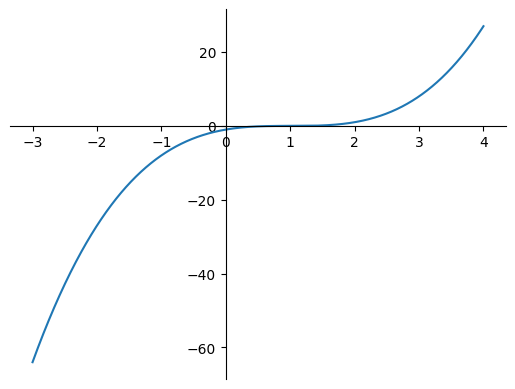

True
True
True
One real root and two complex roots:
x1 =  0.5000000000000001
x2 =  (-1+1.1102230246251565e-16j)
x3 =  (0.49999999999999983-0.8660254037844387j)
y1 = 3.885780586188048e-16j
y2 = 3.3306690738754696e-16j
y3 = (2.220446049250313e-16+4.996003610813204e-16j)


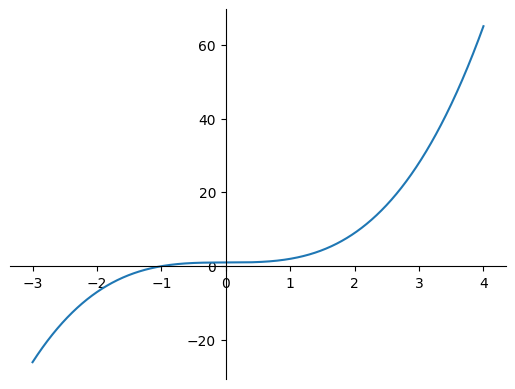

False
True
True
One real root and two complex roots:
x1 =  1.3660254037844386
x2 =  (-0.3660254037844386-0.7886751345948129j)
x3 =  (-1.1102230246251565e-16+0.5773502691896257j)
y1 = (0.9106836025229592+0.8075499102701243j)
y2 = (-0.24401693585629247-1.1924500897298749j)
y3 = (-0.6666666666666667+0.38490017945975064j)


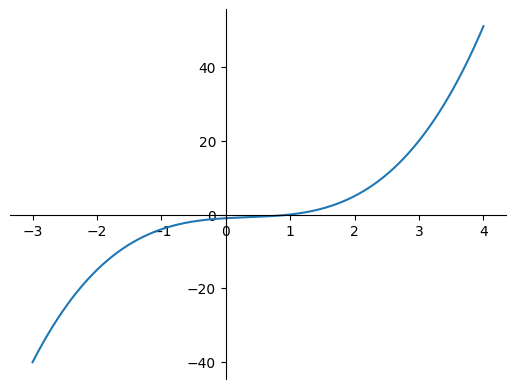

False
True
True
Three real roots, two are equal:
x1 =  1.0
x2 =  -2.0
x3 =  -2.0
y1 = 0.0
y2 = 0.0
y3 = 0.0


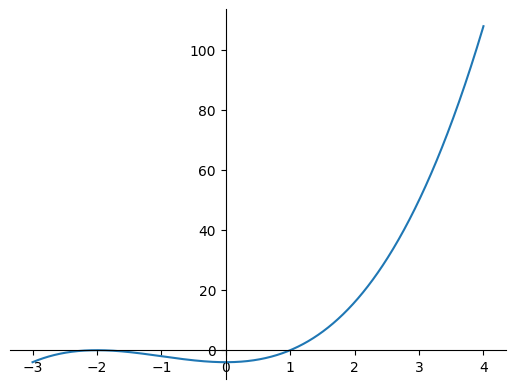

True
True
True
One real root and two complex roots:
x1 =  -1.7462298274040222e-10
x2 =  (-500000.00341662543-288675.13262222294j)
x3 =  (-499999.99658337433-288675.13656740234j)
y1 = (-3.3333333333333254e+17-1.9245008972987494e+17j)
y2 = (1.666666678055417e+17+9.622504289234784e+16j)
y3 = (1.6666666552779136e+17+9.622504683752723e+16j)


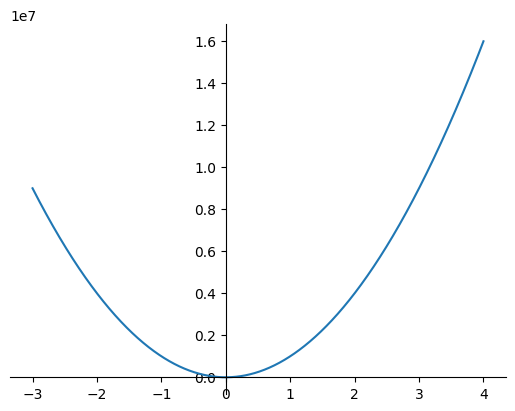

False
True
True
One real root and two complex roots:
x1 =  -2.3283064365386963e-09
x2 =  (-5000000.02473901-2886751.331665051j)
x3 =  (-4999999.975260988-2886751.360231201j)
y1 = (-3.3333333333333246e+20-1.92450089729875e+20j)
y2 = (1.6666666749130025e+20+9.622504343663005e+19j)
y3 = (1.6666666584203284e+20+9.622504629324503e+19j)


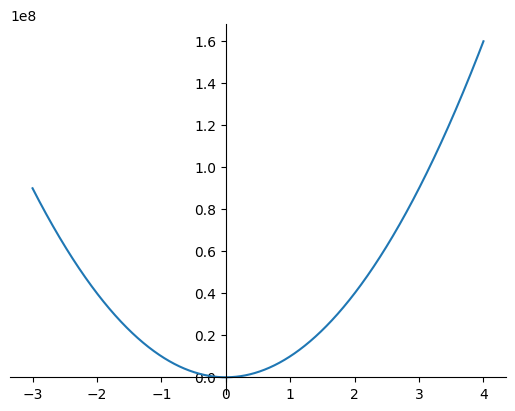

False
True
True
One real root and two complex roots:
x1 =  0.7548776662466923
x2 =  (-0.877438833123346-0.7448617666197447j)
x3 =  (-0.877438833123346+0.7448617666197447j)
y1 = (-1.5543122344752192e-15+0j)
y2 = (6.661338147750939e-16+1.5543122344752192e-15j)
y3 = (6.661338147750939e-16-1.5543122344752192e-15j)


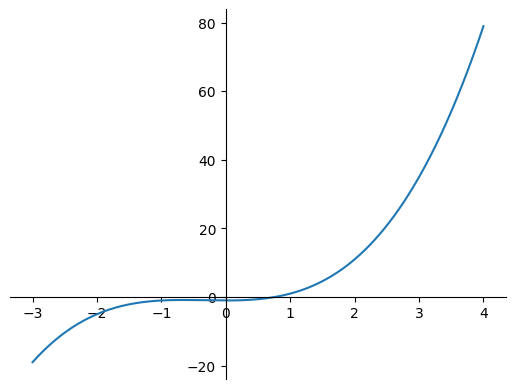

True
True
True
One real root and two complex roots:
x1 =  0.8774388331233463
x2 =  (-0.5837886287621278-0.09877830184710712j)
x3 =  (0.7063497956387815-0.843640068466852j)
y1 = (-0.5441054997900108-0.31413945677131894j)
y2 = (0.4870758206284903-0.21536115492421098j)
y3 = (0.05702967916152102+0.5295006116955314j)


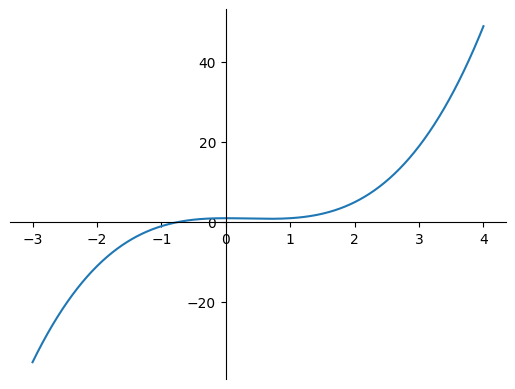

False
True
True
One real root and two complex roots:
x1 =  4.998291842639446e-07
x2 =  (-500000.002416169-288675.1332004142j)
x3 =  (-499999.9975843308-288675.1359900772j)
y1 = (-3.333333333348327e+17-1.924500897307411e+17j)
y2 = (1.666666674727229e+17+9.622504347053907e+16j)
y3 = (1.6666666586211018e+17+9.622504626020211e+16j)


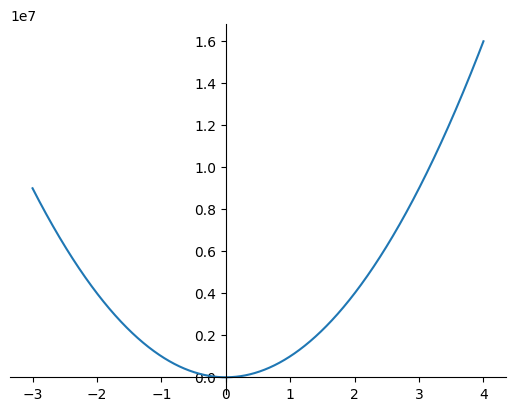

False
False
False
Three distinct real roots:
x1 =  0.028566197957843542
x2 =  -0.02856610342860222
x3 =  -10000000.000000095
y1 = (8160.248114779895+0j)
y2 = (8160.251193728846+0j)
y3 = (431744.000000095+0j)


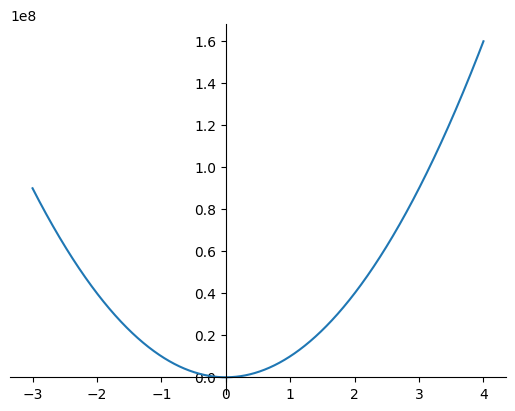

False
False
False
Three real roots, two are equal:
x1 =  999999.9999989995
x2 =  5.002366378903389e-07
x3 =  5.002366378903389e-07
y1 = -448.0000010004733
y2 = 2.4999994400263406e-07
y3 = 2.4999994400263406e-07


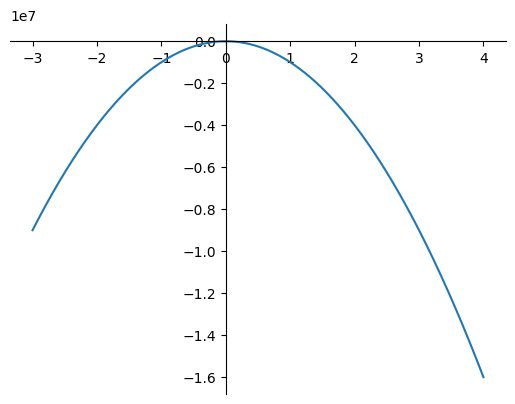

False
False
False
One real root and two complex roots:
x1 =  9999999.999999896
x2 =  (5.2619725465774536e-08-0.02856614994429815j)
x3 =  (5.2619725465774536e-08+0.02856614994429815j)
y1 = (-354688.0000001043+0j)
y2 = (8160.249226426054+0.001520020099662421j)
y3 = (8160.249226426054-0.001520020099662421j)


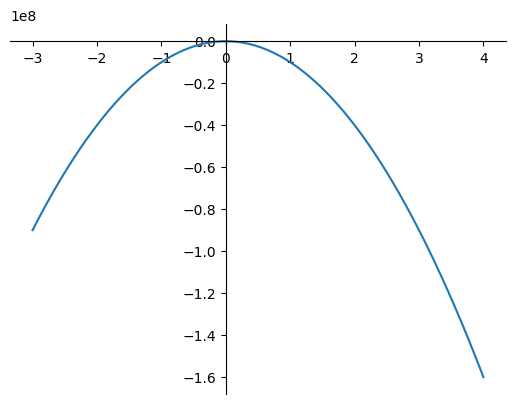

False
False
False
One real root and two complex roots:
x1 =  1000000.0000009995
x2 =  (-4.997709766030312e-07-0.002789663078922575j)
x3 =  (-4.997709766030312e-07+0.002789663078922575j)
y1 = (-448.00000099954195+0j)
y2 = (7.782220343915397+1.2995059994443461e-06j)
y3 = (7.782220343915397-1.2995059994443461e-06j)


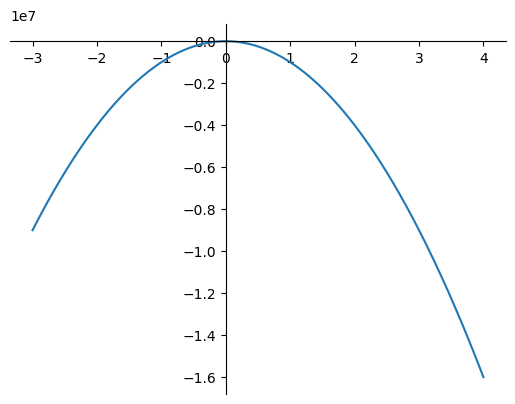

False
False
False
Three distinct real roots:
x1 =  10000000.000000095
x2 =  0.02856610301052097
x3 =  -0.028566197074101005
y1 = (-431744.000000095+0j)
y2 = (-8160.250954869386+0j)
y3 = (-8160.2476098775005+0j)


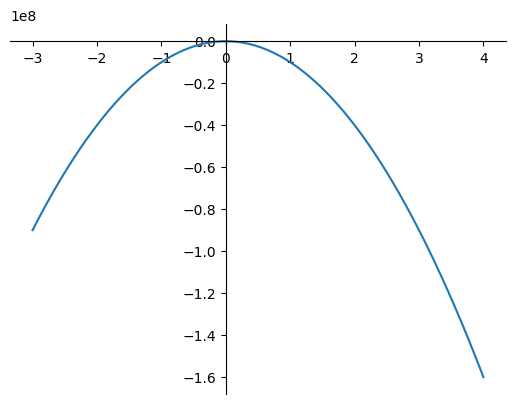

False
False
False
Three real roots, two are equal:
x1 =  -5.001784302294254e-07
x2 =  -499999.9999997499
x3 =  -499999.9999997499
y1 = (-3.333333333318326e+17-1.9245008972900896e+17j)
y2 = (1.666666666659165e+17+9.622504486450451e+16j)
y3 = (1.666666666659165e+17+9.622504486450451e+16j)


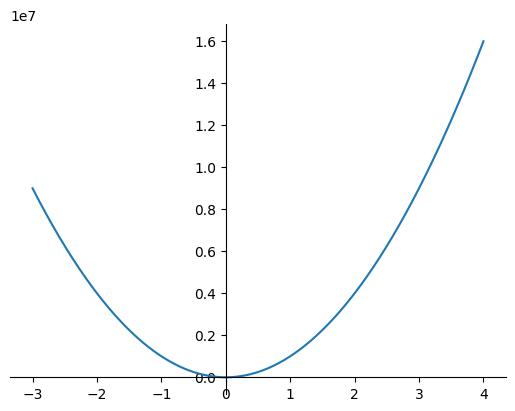

False
False
False
Three real roots, two are equal:
x1 =  -5.001784302294254e-07
x2 =  -499999.9999997499
x3 =  -499999.9999997499
y1 = (-3.333333333318326e+17-1.9245008972900896e+17j)
y2 = (1.666666666659165e+17+9.622504486450451e+16j)
y3 = (1.666666666659165e+17+9.622504486450451e+16j)


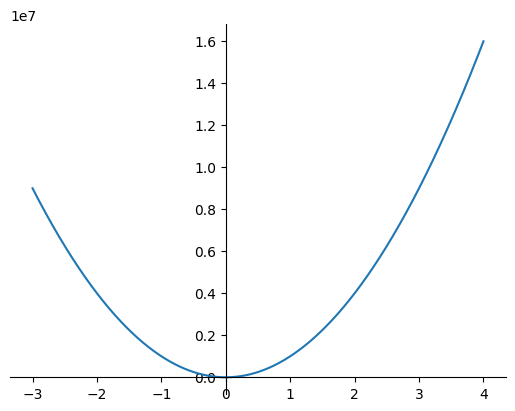

False
False
False
One real root and two complex roots:
x1 =  4.998291842639446e-07
x2 =  (-500000.002416169-288675.1332004142j)
x3 =  (-499999.9975843308-288675.1359900772j)
y1 = (-3.333333333348327e+17-1.924500897307411e+17j)
y2 = (1.666666674727229e+17+9.622504347053907e+16j)
y3 = (1.6666666586211018e+17+9.622504626020211e+16j)


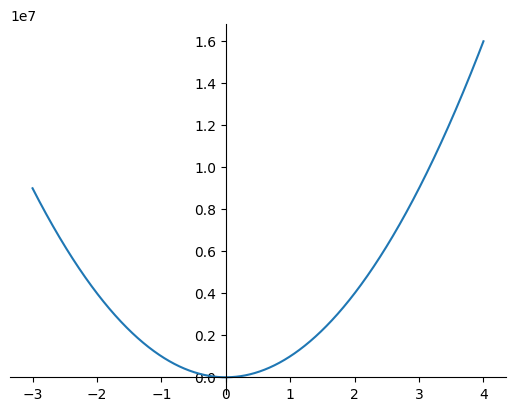

False
False
False
One real root and two complex roots:
x1 =  4.998291842639446e-07
x2 =  (-500000.002416169-288675.1332004142j)
x3 =  (-499999.9975843308-288675.1359900772j)
y1 = (-3.333333333348327e+17-1.924500897307411e+17j)
y2 = (1.666666674727229e+17+9.622504347053907e+16j)
y3 = (1.6666666586211018e+17+9.622504626020211e+16j)


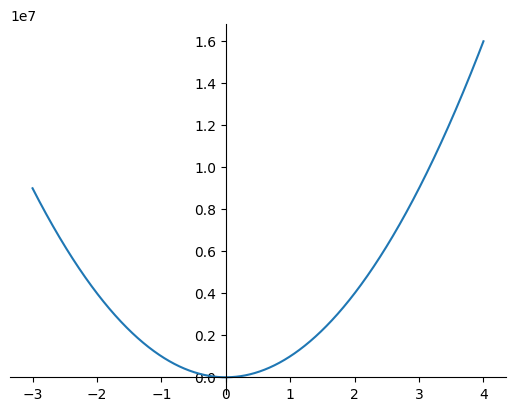

False
False
False
One real root and two complex roots:
x1 =  -5.168840289115906e-08
x2 =  (-5000000.024738985-2886751.331665008j)
x3 =  (-4999999.975260963-2886751.360231158j)
y1 = (-3.333333333333176e+20-1.9245008972986627e+20j)
y2 = (1.666666674912927e+20+9.622504343662569e+19j)
y3 = (1.666666658420253e+20+9.622504629324071e+19j)


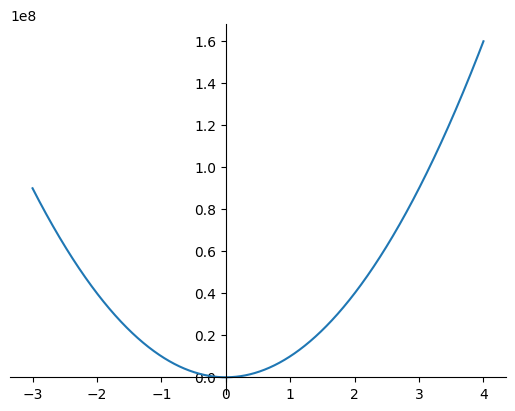

False
False
False
One real root and two complex roots:
x1 =  -5.168840289115906e-08
x2 =  (-5000000.024738985-2886751.331665008j)
x3 =  (-4999999.975260963-2886751.360231158j)
y1 = (-3.333333333333176e+20-1.9245008972986627e+20j)
y2 = (1.666666674912927e+20+9.622504343662569e+19j)
y3 = (1.666666658420253e+20+9.622504629324071e+19j)


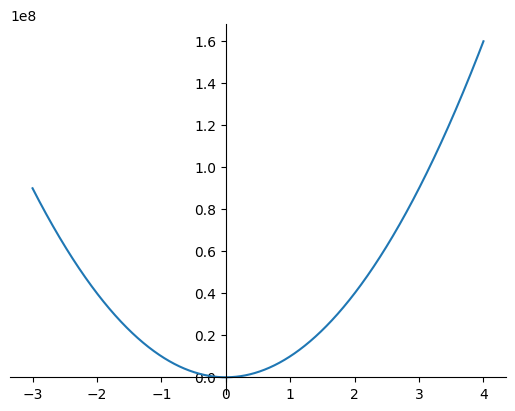

False
False
False
Three distinct real roots:
x1 =  0.028566197957843542
x2 =  -0.02856610342860222
x3 =  -10000000.000000095
y1 = (8161.248114779895+0j)
y2 = (8161.251193728846+0j)
y3 = (431745.000000095+0j)


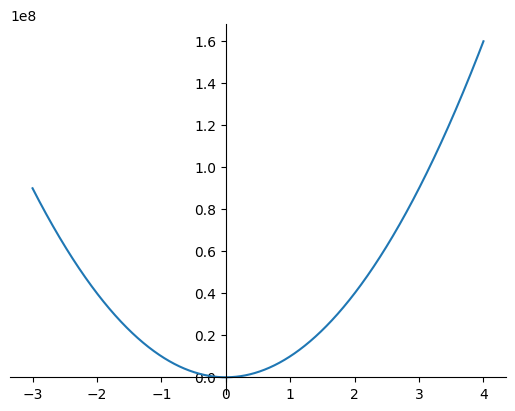

False
False
False
Three distinct real roots:
x1 =  0.028566197957843542
x2 =  -0.02856610342860222
x3 =  -10000000.000000095
y1 = (8159.248114779895+0j)
y2 = (8159.251193728846+0j)
y3 = (431743.000000095+0j)


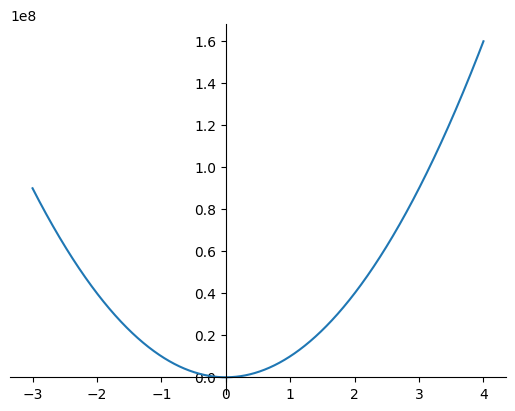

False
False
False
One real root and two complex roots:
x1 =  -2.9802322387695312e-08
x2 =  (-50000000.25332747-28867513.31322257j)
x3 =  (-49999999.7466725-28867513.60573994j)
y1 = (-3.3333333333333225e+23-1.9245008972987485e+23j)
y2 = (1.666666675110914e+23+9.622504340235059e+22j)
y3 = (1.6666666582224153e+23+9.622504632752433e+22j)


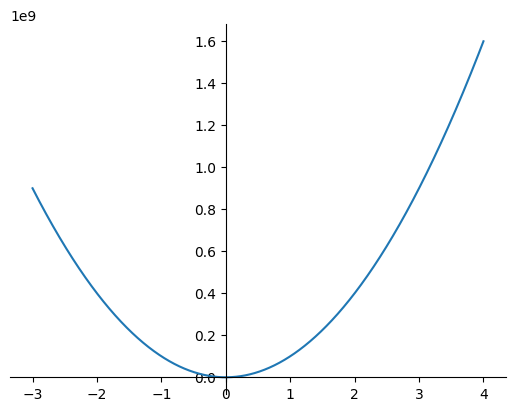

False
False
False
One real root and two complex roots:
x1 =  -2.9802322387695312e-08
x2 =  (-50000000.25332747-28867513.31322257j)
x3 =  (-49999999.7466725-28867513.60573994j)
y1 = (-3.3333333333333225e+23-1.9245008972987485e+23j)
y2 = (1.666666675110914e+23+9.622504340235059e+22j)
y3 = (1.6666666582224153e+23+9.622504632752433e+22j)


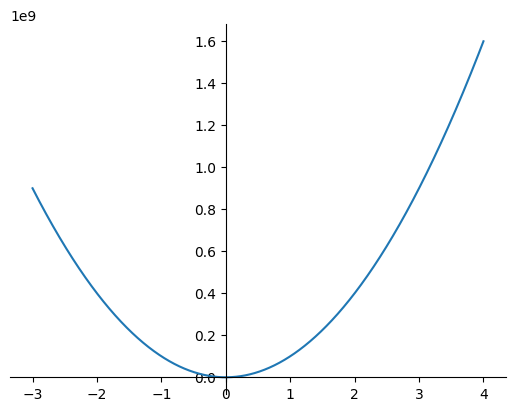

False
False
False
Three distinct real roots:
x1 =  0.358259130269289
x2 =  -0.3582591861486435
x3 =  -99999999.99999994
y1 = (12834961.129854025+0j)
y2 = (12834965.758265587+0j)
y3 = (636870913+0j)


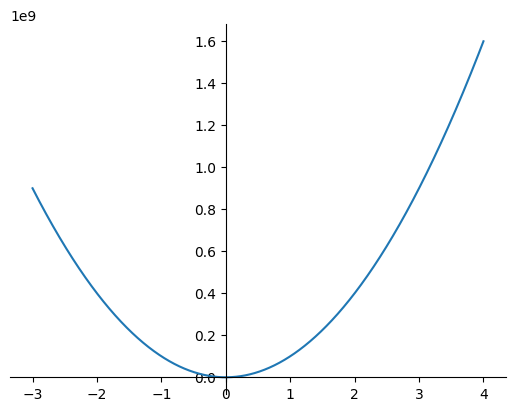

False
False
False
Three distinct real roots:
x1 =  0.358259130269289
x2 =  -0.3582591861486435
x3 =  -99999999.99999994
y1 = (12834959.129854025+0j)
y2 = (12834963.758265587+0j)
y3 = (636870911+0j)


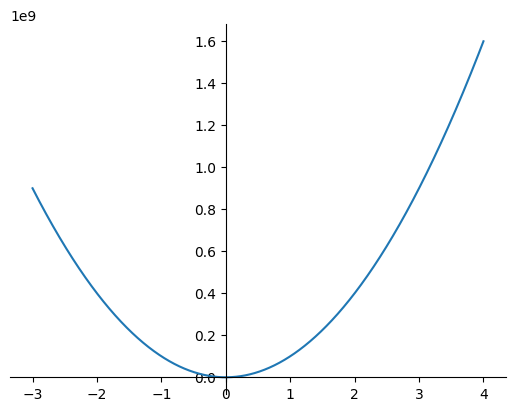

False
False
False


In [12]:
from numpy import allclose

variants = [{'b': -6.0, 'c': 11.0, 'd': -6.0},
            {'b':  0.0, 'c': 0.0, 'd': -1.0},
            {'b': -3.0, 'c': 3.0,  'd':-1.0},
            {'b':  0.0, 'c': 0.0,  'd': 1.0},
            {'b': -1.0, 'c': 1.0,  'd':-1.0},
            {'b':  3.0, 'c': 0.0,  'd':-4.0},
            {'b':  1e6, 'c': 0.0,  'd':0.0},
            {'b':  1e7, 'c': 0.0,  'd':0.0},
            {'b':  1.0, 'c':  0.0, 'd': -1.0},
            {'b': -1.0, 'c': 0.0,  'd': 1.0},
            {'b':  1e6, 'c': -1.0,  'd':0.0},
            {'b':  1e7, 'c': -1.0,  'd':0.0},
            {'b':  -1e6, 'c': 1.0,  'd':0.0},
            {'b':  -1e7, 'c': 1.0,  'd':0.0},
            {'b':  -1e6, 'c': -1.0,  'd':0.0},
            {'b':  -1e7, 'c': -1.0,  'd':0.0},
            {'b':  1e6, 'c': 1.0,  'd':1.0},
            {'b':  1e6, 'c': 1.0,  'd':-1.0},
            {'b':  1e6, 'c': -1.0,  'd':1.0},
            {'b':  1e6, 'c': -1.0,  'd':-1.0},
            {'b':  1e7, 'c': 1.0,  'd':1.0},
            {'b':  1e7, 'c': 1.0,  'd':-1.0},
            {'b':  1e7, 'c': -1.0,  'd':1.0},
            {'b':  1e7, 'c': -1.0,  'd':-1.0},
            {'b':  1e8, 'c': 1.0,  'd':1.0},
            {'b':  1e8, 'c': 1.0,  'd':-1.0},
            {'b':  1e8, 'c': -1.0,  'd':1.0},
            {'b':  1e8, 'c': -1.0,  'd':-1.0},]

for var in variants:

   x1, x2, x3= solve_cubic(**var)
   print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))

   x1, x2, x3= solve_cubic_np_roots(**var)
   print(allclose(cubic(1,var['b'],var['c'],var['d'],x1), 0.0) and allclose(cubic(1,var['b'],var['c'],var['d'],x2), 0.0) and  allclose(cubic(1,var['b'],var['c'],var['d'],x3), 0.0))

   roots = solve_cubic_sympy_solve(**var)
   ans = True
   for root in roots:
        ans = ans and allclose(cubic(1,var['b'],var['c'],var['d'],complex(root)), 0.0)
   print(ans)


One real root and two complex roots:
x1 =  0.8660254037844388
x2 =  (-0.8660254037844387-0.5j)
x3 =  (-1.1102230246251565e-16-2.7755575615628914e-17j)
y1 = (0.866025403784439+1.5000000000000004j)
y2 = (-0.8660254037844388-1.5000000000000002j)
y3 = (-1.1102230246251565e-16-2.7755575615628914e-17j)


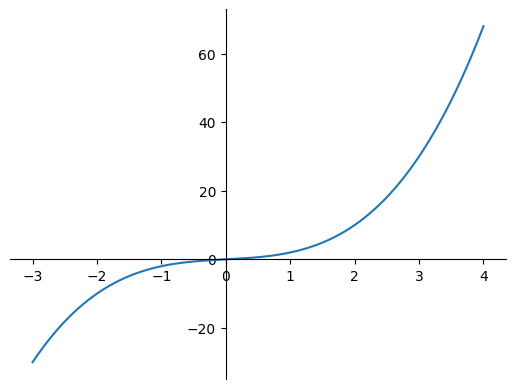

[0.8660254037844388,
 (-0.8660254037844387-0.5j),
 (-1.1102230246251565e-16-2.7755575615628914e-17j)]

In [13]:
solve_cubic(0, 1, 0)

Three real roots, two are equal:
x1 =  1.0
x2 =  -2.0
x3 =  -2.0
y1 = 0.0
y2 = 0.0
y3 = 0.0


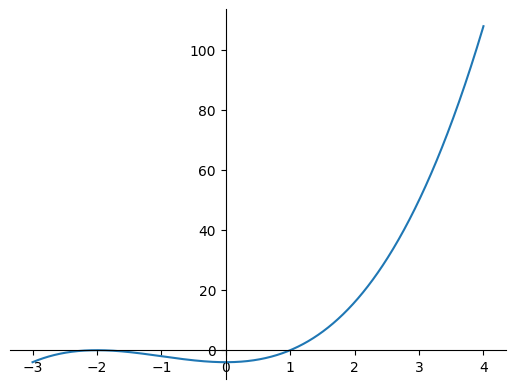

[1.0, -2.0, -2.0]

In [14]:
solve_cubic( 3.0 , 0.0 , -4.0 )